In the Notebook we are looking to explore the HANNA data base.

In [1]:
# importations
import csv
import json
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pingouin as pg 
from scipy.special import binom
import scipy.stats as st
from scipy.stats import pearsonr, spearmanr, kendalltau
import seaborn as sns
from sklearn.metrics import f1_score
from utils import *

# Loading the data 

In [38]:
data_annotations = pd.read_csv("hanna_stories_annotations.csv")

There are 96 different prompts and thus for each model there are 96 stories.

In [39]:
data_annotations.head()

,Story ID,Prompt,Human,Story,Model,Relevance,Coherence,Empathy,Surprise,Engagement,Complexity,Worker ID,Assignment ID,Work time in seconds,Name
0,0,When you die the afterlife is an arena where y...,"3,000 years have I been fighting. Every mornin...","3,000 years have I been fighting. Every mornin...",Human,4,4,3,2,4,4,A2VE5IV9OD2SK1,3X87C8JFVHIT235KQ4UTS8264I6SQJ,579.0,None
1,0,When you die the afterlife is an arena where y...,"3,000 years have I been fighting. Every mornin...","3,000 years have I been fighting. Every mornin...",Human,5,5,1,3,4,1,A1IZ4NX41GKU4X,3DR23U6WEGL5K0SU6D4J8W9EM9LTE7,82.0,none
2,0,When you die the afterlife is an arena where y...,"3,000 years have I been fighting. Every mornin...","3,000 years have I been fighting. Every mornin...",Human,2,2,3,2,2,3,A264NN7JBX4UDQ,3UJ1CZ6IZSW49HMM6C6QUX7F7UV5SA,273.0,none
3,1,A new law is enacted that erases soldiers memo...,"“Dad, you 're on TV again !” I heard Eric 's v...","“Dad, you 're on TV again !” I heard Eric 's v...",Human,5,5,3,4,4,4,A3CFNUD7VR2E1E,317HQ483IIZJ5SPW508YKC1EP6RINX,117.0,Eric
4,1,A new law is enacted that erases soldiers memo...,"“Dad, you 're on TV again !” I heard Eric 's v...","“Dad, you 're on TV again !” I heard Eric 's v...",Human,5,4,4,4,4,4,A2VE5IV9OD2SK1,3T3IWE1XGHUUH3IZF4ZJ2DYS57WQTT,751.0,Eric


The different model used are as follow:

In [40]:
data_annotations['Model'].unique()

array(['Human', 'BertGeneration', 'CTRL', 'GPT', 'GPT-2 (tag)', 'GPT-2',
       'RoBERTa', 'XLNet', 'Fusion', 'HINT', 'TD-VAE'], dtype=object)

In [41]:
data_scores = pd.read_csv("hanna_metric_scores.csv")
data_scores

,Model,Relevance,Coherence,Empathy,Surprise,Engagement,Complexity,BLEU Ξ§,ROUGE-1 Recall Ξ§,ROUGE-1 Precision Ξ§,...,Repetition-2 ¤§,Repetition-3 ¤§,SUPERT-PS ¤ε,SUPERT-SS ¤ε,BLANC-Tune-PS ¤Δ,BLANC-Help-PS ¤Δ,BLANC-Tune-SS ¤Δ,BLANC-Help-SS ¤Δ,BARTScore-PS ¤Δ,BARTScore-SP ¤Δ
0,Human,"[3.6666666666666665, 5.0, 4.666666666666667, 3...","[3.6666666666666665, 4.666666666666667, 4.6666...","[2.3333333333333335, 4.0, 4.0, 3.0, 3.0, 3.333...","[2.3333333333333335, 3.6666666666666665, 4.333...","[3.3333333333333335, 3.6666666666666665, 4.0, ...","[2.6666666666666665, 4.0, 4.333333333333333, 4...","[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,"[0.10407239819004525, 0.1198501872659176, 0.07...","[0.029288702928870293, 0.03691275167785235, 0....","[0.36060585433665243, 0.30589759827771107, 0.2...","[0.3513956792291503, 0.3298352311450941, 0.273...","[0.0, 0.040983606557377046, -0.011111111111111...","[-0.02608695652173913, 0.0, -0.011111111111111...","[0.058823529411764705, -0.14285714285714285, 0...","[-0.23529411764705882, -0.14285714285714285, 0...","[-4.046356201171875, -4.839603424072266, -4.85...","[-4.624497413635254, -6.575280666351318, -4.77..."
1,BertGeneration,"[1.6666666666666667, 3.0, 1.3333333333333333, ...","[3.6666666666666665, 2.6666666666666665, 2.333...","[2.6666666666666665, 2.6666666666666665, 1.0, ...","[1.3333333333333333, 2.0, 1.6666666666666667, ...","[2.6666666666666665, 2.6666666666666665, 1.333...","[2.6666666666666665, 2.6666666666666665, 1.333...","[1.4336111822, 1.4493826988, 0.1779090484, 0.1...","[0.38249, 0.24074, 0.16285, 0.13276, 0.40645, ...","[0.37054, 0.26639, 0.59259, 0.56771, 0.26923, ...",...,"[0.08888888888888889, 0.0546875, 0.05676855895...","[0.044534412955465584, 0.022641509433962263, 0...","[0.2597054082262463, 0.20473734339818345, 0.24...","[0.3097425349207481, 0.20473734339818345, 0.24...","[-0.01834862385321101, -0.014184397163120567, ...","[-0.03669724770642202, -0.02127659574468085, -...","[-0.058823529411764705, -0.2857142857142857, 0...","[-0.058823529411764705, -0.14285714285714285, ...","[-3.913217067718506, -5.507814407348633, -4.62...","[-4.915536880493164, -6.616286277770996, -5.14..."
2,CTRL,"[2.3333333333333335, 3.6666666666666665, 2.666...","[3.0, 3.3333333333333335, 3.3333333333333335, ...","[2.3333333333333335, 3.3333333333333335, 3.333...","[2.6666666666666665, 1.3333333333333333, 3.0, ...","[2.6666666666666665, 3.3333333333333335, 3.333...","[2.6666666666666665, 3.0, 3.0, 2.3333333333333...","[1.2558030838, 2.775216509, 0.400491848, 0.271...","[0.29954, 0.30741, 0.18702, 0.19367, 0.23871, ...","[0.38922, 0.3547, 0.54444, 0.60456, 0.30833, 0...",...,"[0.042328042328042326, 0.09154929577464789, 0....","[0.01020408163265306, 0.01910828025477707, 0.0...","[0.25552435405490376, 0.1820114012358586, 0.30...","[0.25552435405490376, 0.14368366145385317, 0.2...","[0.0, 0.008333333333333333, -0.011904761904761...","[-0.012345679012345678, -0.008333333333333333,...","[-0.058823529411764705, 0.0, 0.0, 0.0, 0.0, 0....","[-0.058823529411764705, -0.14285714285714285, ...","[-5.204783916473389, -4.947543144226074, -4.69...","[-4.883750915527344, -6.809321403503418, -4.91..."
3,GPT,"[3.6666666666666665, 3.0, 2.6666666666666665, ...","[3.6666666666666665, 3.0, 2.3333333333333335, ...","[3.0, 2.3333333333333335, 2.6666666666666665, ...","[3.0, 2.3333333333333335, 1.3333333333333333, ...","[3.0, 3.0, 2.0, 2.3333333333333335, 3.0, 3.0, ...","[2.6666666666666665, 3.0, 2.3333333333333335, ...","[0.9493520114, 2.3140339956, 0.1505541131, 0.2...","[0.24424, 0.3037, 0.1374, 0.05359, 0.34194, 0....","[0.29944, 0.36771, 0.5567, 0.72131, 0.26633, 0...",...,"[0.075, 0.07623318385650224, 0.137055837563451...","[0.018779342723004695, 0.012195121951219513, 0...","[0.3434531769248544, 0.2605565346424716, 0.309...","[0.3892346136855479, 0.2520803726283153, 0.310...","[0.010638297872340425, -0.0175

In [42]:
data_scores = data_scores.loc[1:]

# Correlation

## Story-level correlation

We want to average out on all of our stories the criterion beteween metric 1 and metric 2.  

In [44]:
# story-level correlation

def story_level_plot(data,metrics1, metrics2,path, criterion, plot_size=  (30,45),
                    name_metrics1=None,name_metrics2= None):
    # metrics 1 is a list with the names of the metric you want your lines to be
    # metrics 2 is a list with the names of the metric you want your columns to be
    # criterion is either 'kendall', 'spearman' or 'pearson'
    # plot_size is a tuple with the plot size you want
    
    N=len(metrics1)
    M=len(metrics2)
    corr_story_matrix= np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            c_metric1= np.array( [json.loads(l) for l in data[metrics1[i]].tolist()]).T
            c_metric2= np.array( [json.loads(l) for l in data[metrics2[j]].tolist()]).T
    
         
            if criterion== 'kendall':
                k=np.zeros(96)
                for l in range(96):
                    k[l]=kendalltau(c_metric1[l],c_metric2[l] )[0]
                corr_story_matrix[i,j]= abs(round(100*k.mean()))

            elif criterion== 'pearson':
                k=np.zeros(96)
                for l in range(96):
                    k[l]=pearsonr(c_metric1[l],c_metric2[l] )[0]
                corr_story_matrix[i,j]= abs(round(100*k.mean()))
            
    
            elif criterion== 'spearman':
                k=np.zeros(96)
                for l in range(96):
                    k[l]=spearmanr(c_metric1[l],c_metric2[l] )[0]
                corr_story_matrix[i,j]= abs(round(100*k.mean()))
    
    if name_metrics2==None:
        nm2=metrics2
    else:
        nm2= name_metrics2
    if name_metrics1==None:
        nm1=metrics1
    else:
        nm1= name_metrics1
    plt.figure(figsize = plot_size)
    heatmap=sns.heatmap(corr_story_matrix, 
                    annot=True, 
                    cmap='coolwarm', square=True, vmin=0, vmax=100,
                    xticklabels=nm2,
                    yticklabels=nm1,cbar=False)


    heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
    plt.savefig(path,dpi=600)
    # Display the plot
    plt.show() 

### Story-level Kendall correlations (%) between human criteria

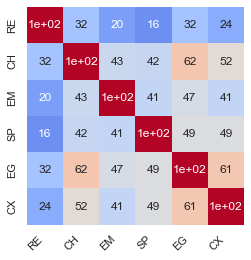

In [45]:
human_scores=['Relevance', 'Coherence', 'Empathy', 'Surprise', 'Engagement', 'Complexity']
human_scores_names=['RE', 'CH', 'EM', 'SP', 'EG', 'CX']


story_level_plot(data_scores, human_scores, human_scores, 'Figures/fig1.jpg', 'kendall', (4,4),
                 name_metrics1=human_scores_names,
                 name_metrics2=human_scores_names)

### Correlation matrix story-level for Pearson criterion between human criteria

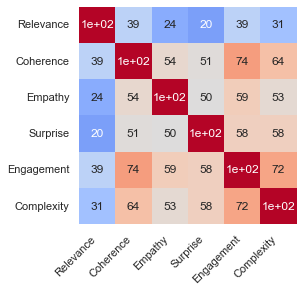

In [47]:
story_level_plot(data_scores,human_scores, human_scores, 'Figures/fig1_pearson.jpg', 'pearson', (4,4))

### Correlation matrix story-level for spearman criterion between human criteria

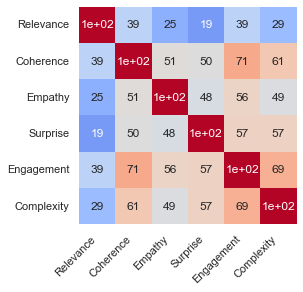

In [48]:
story_level_plot(data_scores, human_scores, human_scores,'Figures/fig1_spearman.jpg',  'spearman', (4,4))

### Story-level absolute Kendall correlations (%) between automatic metrics

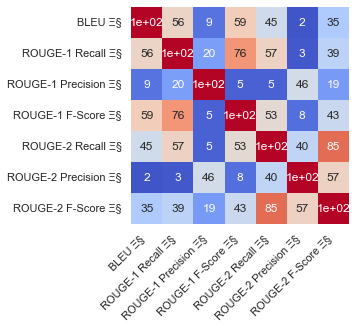

In [52]:
all_columns=data_scores.columns
automatic_metrics= all_columns[7:14]

story_level_plot(data_scores, automatic_metrics,automatic_metrics,'Figures/fig3.jpg', 'kendall',  (4,4)) 

## System-level correlation

In [53]:
# system-level correlation

def system_level_plot(data, 
                      metrics1,
                      metrics2,
                      criterion, 
                      path,
                      plot_size=  (30,45),
                      name_metrics1=None,name_metrics2= None):
    # metrics 1 is a list with the names of the metric you want your lines to be
    # metrics 2 is a list with the names of the metric you want your columns to be
    # criterion is either 'kendall', 'spearman' or 'pearson'
    # plot_size is a tuple with the plot size you want
    
    N=len(metrics1)
    M=len(metrics2)
    corr_story_matrix= np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            c_metric1= np.array( [json.loads(l) for l in data[metrics1[i]].tolist()]).T
            c_metric2= np.array( [json.loads(l) for l in data[metrics2[j]].tolist()]).T
            
            if criterion== 'kendall':
                
                k= kendalltau( np.mean(c_metric1, axis=0),np.mean(c_metric2, axis=0) )[0]
                corr_story_matrix[i,j]= abs(round(100*k))
            elif criterion== 'pearson':
                
                k= pearsonr( np.mean(c_metric1, axis=0),np.mean(c_metric2, axis=0) )[0]
                corr_story_matrix[i,j]= abs(round(100*k))
            
            elif criterion== 'spearman':
                
                k= spearmanr( np.mean(c_metric1, axis=0),np.mean(c_metric2, axis=0) )[0]
                corr_story_matrix[i,j]= abs(round(100*k))

    if name_metrics2==None:
        nm2=metrics2
    else:
        nm2= name_metrics2
    if name_metrics1==None:
        nm1=metrics1
    else:
        nm1= name_metrics1
                
    plt.figure(figsize = plot_size)
    heatmap=sns.heatmap(corr_story_matrix, 
                    annot=True, 
                    cmap='coolwarm', square=True, vmin=0, vmax=100,
                    xticklabels=nm2,
                    yticklabels=nm1,cbar=False)


    heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
    plt.savefig(path, dpi=600)
    # Display the plot
    plt.show() 

### Fig. 2: System-level Kendall correlations (%) between human criteria

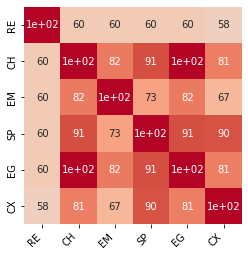

In [14]:
human_scores=['Relevance', 'Coherence', 'Empathy', 'Surprise', 'Engagement', 'Complexity']

system_level_plot(data_scores,human_scores,human_scores, 'kendall', 'Figures/system_human_corr.jpg', (4,4), name_metrics1=human_scores_names,
                 name_metrics2=human_scores_names) 

### Fig. 4: System-level absolute Kendall correlations (%) between metrics and criteria.

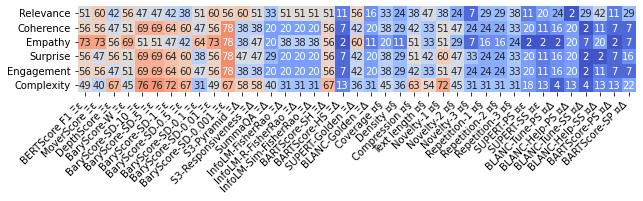

In [15]:
all_columns=data_scores.columns
automatic_metrics= all_columns[40:]

system_level_plot(data_scores,human_scores,automatic_metrics, 'kendall', 'Figures/all_metrics_human_corr.jpg', (10,50) )

# INTRA ROUGE 

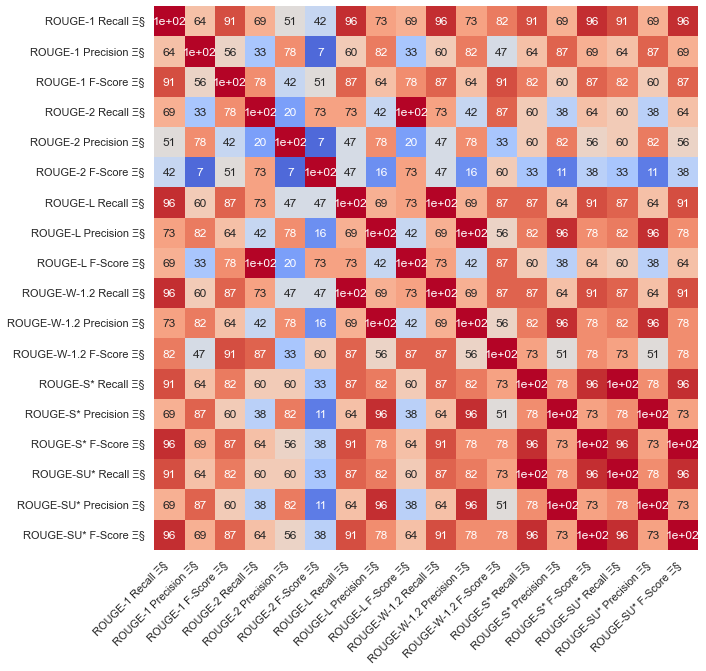

In [54]:
human_scores=['Relevance', 'Coherence', 'Empathy', 'Surprise', 'Engagement', 'Complexity']

all_columns=data_scores.columns
automatic_metrics= all_columns[7:20]
rouge_no_3_4= list(all_columns[8:14])+list(all_columns[20:32])

system_level_plot(data_scores,rouge_no_3_4,rouge_no_3_4, 'kendall', 'Figures/rouge_corr_system.jpg', (10,10) )


## Let's find the best metric intra ROUGE metrics. 

In this data set there are 24 ROUGE metrics. In order to compare the ROUGE metrics against the oder metrics we first wanted to find the best one intra the ROUGE category. For that we looked into the story level and system level correlation between the ROUGE metrics and the human scores.

In [17]:
all_columns=data_scores.columns
rouge_metrics= all_columns[8:32]
rouge_no_3_4= list(all_columns[8:14])+list(all_columns[20:32])

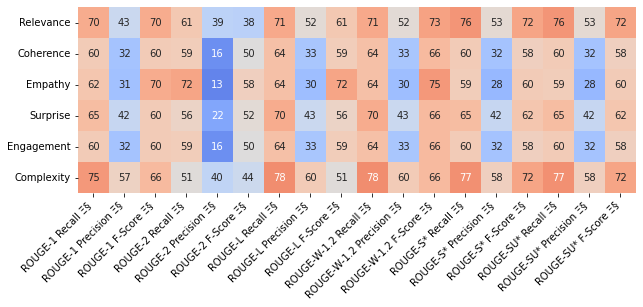

In [18]:
human_scores=['Relevance', 'Coherence', 'Empathy', 'Surprise', 'Engagement', 'Complexity']

system_level_plot(data_scores,human_scores,list(all_columns[8:14])+list(all_columns[20:32]), 'spearman','Figures/rouge_system_level.jpg', (10,6) )

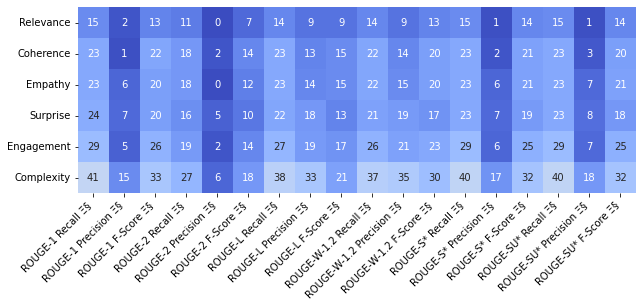

In [19]:
story_level_plot(data_scores,human_scores,list(all_columns[8:14])+list(all_columns[20:32]), 'Figures/rouge_story_level.jpg','kendall', (10,10) )

In [64]:
def best_story_level(metrics1,
                      metrics2,
                      criterion):
    # metrics 1 is a list with the names of the metric you want your lines to be
    # metrics 2 is a list with the names of the metric you want your columns to be
    # criterion is either 'kendall', 'spearman' or 'pearson'
    # plot_size is a tuple with the plot size you want
    
    N=len(metrics1)
    M=len(metrics2)
    corr_story_matrix= np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            c_metric1= np.array( [json.loads(l) for l in data_scores[metrics1[i]].tolist()]).T
            c_metric2= np.array( [json.loads(l) for l in data_scores[metrics2[j]].tolist()]).T
    
         
            if criterion== 'kendall':
                k=np.zeros(96)
                for l in range(96):
                    k[l]=kendalltau(c_metric1[l],c_metric2[l] )[0]
                corr_story_matrix[i,j]= abs(k.mean())

            elif criterion== 'pearson':
                k=np.zeros(96)
                for l in range(96):
                    k[l]=pearsonr(c_metric1[l],c_metric2[l] )[0]
                corr_story_matrix[i,j]= abs(k.mean())
            
    
            elif criterion== 'spearman':
                k=np.zeros(96)
                for l in range(96):
                    k[l]=spearmanr(c_metric1[l],c_metric2[l] )[0]
                corr_story_matrix[i,j]= abs(k.mean())
    
    df_corr = pd.DataFrame(corr_story_matrix,columns=metrics2)
 
    for i in range(len(df_corr)):
        sorted_columns = df_corr.iloc[i].nlargest(3)
        print(f"{metrics1[i]}:  {sorted_columns.index.tolist()}, {sorted_columns.tolist()}")
   

In [65]:
best_story_level(human_scores,rouge_no_3_4, 'pearson')

Relevance:  ['ROUGE-1 Recall Ξ§', 'ROUGE-1 F-Score Ξ§', 'ROUGE-W-1.2 Recall Ξ§'], [0.1938305843894735, 0.18261585802791966, 0.18136550216834868]
Coherence:  ['ROUGE-1 Recall Ξ§', 'ROUGE-1 F-Score Ξ§', 'ROUGE-W-1.2 Recall Ξ§'], [0.35383429944019484, 0.33940857676958114, 0.33485314938260197]
Empathy:  ['ROUGE-1 Recall Ξ§', 'ROUGE-SU* Recall Ξ§', 'ROUGE-S* Recall Ξ§'], [0.30605692474532054, 0.28964246456467335, 0.28938520095512565]
Surprise:  ['ROUGE-1 Recall Ξ§', 'ROUGE-SU* Recall Ξ§', 'ROUGE-S* Recall Ξ§'], [0.3132220002468147, 0.28127017783017116, 0.28086271167710253]
Engagement:  ['ROUGE-1 Recall Ξ§', 'ROUGE-1 F-Score Ξ§', 'ROUGE-L Recall Ξ§'], [0.39376604693193745, 0.36399542592722517, 0.3617924771099612]
Complexity:  ['ROUGE-1 Recall Ξ§', 'ROUGE-SU* Recall Ξ§', 'ROUGE-S* Recall Ξ§'], [0.5500931677216258, 0.5106217537846183, 0.5099569452301664]


In [56]:
def best_system_level(metrics1,
                      metrics2,
                      criterion):
    # metrics 1 is a list with the names of the metric you want your lines to be
    # metrics 2 is a list with the names of the metric you want your columns to be
    # criterion is either 'kendall', 'spearman' or 'pearson'
    # plot_size is a tuple with the plot size you want
    
     
    N=len(metrics1)
    M=len(metrics2)
    corr_story_matrix= np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            c_metric1= np.array( [json.loads(l) for l in data_scores[metrics1[i]].tolist()]).T
            c_metric2= np.array( [json.loads(l) for l in data_scores[metrics2[j]].tolist()]).T
            
            if criterion== 'kendall':
                
                k= kendalltau( np.mean(c_metric1, axis=0),np.mean(c_metric2, axis=0) )[0]
                corr_story_matrix[i,j]= abs(round(100*k))
            elif criterion== 'pearson':
                
                k= pearsonr( np.mean(c_metric1, axis=0),np.mean(c_metric2, axis=0) )[0]
                corr_story_matrix[i,j]= abs(round(100*k))
            
            elif criterion== 'spearman':
                
                k= spearmanr( np.mean(c_metric1, axis=0),np.mean(c_metric2, axis=0) )[0]
                corr_story_matrix[i,j]= abs(round(100*k))

    df_corr = pd.DataFrame(corr_story_matrix,columns=metrics2)
 
    for i in range(len(df_corr)):
        sorted_columns = df_corr.iloc[i].nlargest(3)
        print(f"{metrics1[i]}:  {sorted_columns.index.tolist()}, {sorted_columns.tolist()}")
   
   

In [57]:

best_system_level(human_scores,rouge_no_3_4, 'spearman')

Relevance:  ['ROUGE-S* Recall Ξ§', 'ROUGE-SU* Recall Ξ§', 'ROUGE-W-1.2 F-Score Ξ§'], [76.0, 76.0, 73.0]
Coherence:  ['ROUGE-W-1.2 F-Score Ξ§', 'ROUGE-L Recall Ξ§', 'ROUGE-W-1.2 Recall Ξ§'], [66.0, 64.0, 64.0]
Empathy:  ['ROUGE-W-1.2 F-Score Ξ§', 'ROUGE-2 Recall Ξ§', 'ROUGE-L F-Score Ξ§'], [75.0, 72.0, 72.0]
Surprise:  ['ROUGE-L Recall Ξ§', 'ROUGE-W-1.2 Recall Ξ§', 'ROUGE-W-1.2 F-Score Ξ§'], [70.0, 70.0, 66.0]
Engagement:  ['ROUGE-W-1.2 F-Score Ξ§', 'ROUGE-L Recall Ξ§', 'ROUGE-W-1.2 Recall Ξ§'], [66.0, 64.0, 64.0]
Complexity:  ['ROUGE-L Recall Ξ§', 'ROUGE-W-1.2 Recall Ξ§', 'ROUGE-S* Recall Ξ§'], [78.0, 78.0, 77.0]


### Best metrics for human criteria

In [68]:
best_system_level(human_scores, all_columns[7:] , 'kendall')

Relevance:  ['ROUGE-W-1.2 F-Score Ξ§', 'ROUGE-S* Recall Ξ§', 'ROUGE-SU* Recall Ξ§'], [60.0, 60.0, 60.0]
Coherence:  ['BaryScore-SD-0.001 Ξε', 'BaryScore-SD-10 Ξε', 'BaryScore-SD-5 Ξε'], [78.0, 69.0, 69.0]
Empathy:  ['BaryScore-SD-0.001 Ξε', 'BERTScore F1 Ξε', 'MoverScore Ξε'], [78.0, 73.0, 73.0]
Surprise:  ['BaryScore-SD-0.001 Ξε', 'BaryScore-SD-10 Ξε', 'BaryScore-SD-5 Ξε'], [78.0, 69.0, 69.0]
Engagement:  ['BaryScore-SD-0.001 Ξε', 'BaryScore-SD-10 Ξε', 'BaryScore-SD-5 Ξε'], [78.0, 69.0, 69.0]
Complexity:  ['BaryScore-SD-10 Ξε', 'BaryScore-SD-5 Ξε', 'BaryScore-SD-1 Ξε'], [76.0, 76.0, 72.0]


In [67]:
best_story_level(human_scores, all_columns[7:] , 'kendall')

Relevance:  ['SUPERT-SS ¤ε', 'BARTScore-SP ¤Δ', 'SUPERT-PS ¤ε'], [0.2994591031178269, 0.2961188746751244, 0.28591879931751274]
Coherence:  ['ROUGE-WE-3 Recall Ξε', 'BARTScore-SH ΞΔ', 'chrF Ξ§'], [0.25290021988662037, 0.2506120491317956, 0.246078243501934]
Empathy:  ['ROUGE-WE-3 Recall Ξε', 'chrF Ξ§', 'S3-Pyramid ΞΔ'], [0.23580127723082986, 0.23334102569476647, 0.2319385944055843]
Surprise:  ['chrF Ξ§', 'ROUGE-1 Recall Ξ§', 'S3-Responsiveness ΞΔ'], [0.2445034815501194, 0.23671452291166792, 0.23353479005781572]
Engagement:  ['chrF Ξ§', 'S3-Pyramid ΞΔ', 'ROUGE-1 Recall Ξ§'], [0.3077140616667673, 0.29621675125524144, 0.29193016349974005]
Complexity:  ['chrF Ξ§', 'ROUGE-1 Recall Ξ§', 'ROUGE-SU* Recall Ξ§'], [0.43307161063647764, 0.40654309762062707, 0.39828793947713037]


# Best metrics time 

## Fig 1: Correlation with humans over time considering all existing metrics combined

 
 
 'BLEU Ξ§', 2002
 
 'ROUGE-1 Recall Ξ§', 2004
 'ROUGE-1 Precision Ξ§',
 'ROUGE-1 F-Score Ξ§', 
 'ROUGE-2 Recall Ξ§', 
 'ROUGE-2 Precision Ξ§',
 'ROUGE-2 F-Score Ξ§', 
 'ROUGE-3 Recall Ξ§',
 'ROUGE-3 Precision Ξ§',
 'ROUGE-3 F-Score Ξ§', 
 'ROUGE-4 Recall Ξ§', 
 'ROUGE-4 Precision Ξ§',
 'ROUGE-4 F-Score Ξ§', 
 'ROUGE-L Recall Ξ§', 
 'ROUGE-L Precision Ξ§',
 'ROUGE-L F-Score Ξ§', 
 'ROUGE-W-1.2 Recall Ξ§',
 'ROUGE-W-1.2 Precision Ξ§', 
 'ROUGE-W-1.2 F-Score Ξ§',
 'ROUGE-S* Recall Ξ§', 
 'ROUGE-S* Precision Ξ§', 
 'ROUGE-S* F-Score Ξ§',
 'ROUGE-SU* Recall Ξ§', 
 'ROUGE-SU* Precision Ξ§', 
 'ROUGE-SU* F-Score Ξ§',
 
 'METEOR Ξ§', 2005
 
 'chrF Ξ§', 2015
 
 'CIDEr Ξ§', 2015
 
 'ROUGE-WE-3 Recall Ξε', 2015
 'ROUGE-WE-3 Precision Ξε', 
 'ROUGE-WE-3 F-Score Ξε',
 
 
   'S3-Pyramid ΞΔ', 2017
   'S3-Responsiveness ΞΔ',
   
   
  'Coverage ¤§', 2018
  'Density ¤§',2018
   'Compression ¤§', 2018
 
  'MoverScore Ξε', 2019
 
   'SummaQA ΞΔ', 2019
 
 'BERTScore Precision Ξε', 2020
 'BERTScore Recall Ξε', 
 'BERTScore F1 Ξε',
 
   'SUPERT-Golden ΞΔ',  2020
   'SUPERT-PS ¤ε',  2020
   'SUPERT-SS ¤ε', 
   
  'BLANC-Golden ΞΔ', 2020
   'BLANC-Tune-PS ¤Δ', 
   'BLANC-Help-PS ¤Δ',
  'BLANC-Tune-SS ¤Δ', 
  'BLANC-Help-SS ¤Δ', 
  'BARTScore-PS ¤Δ',
   'BARTScore-SP ¤Δ'

 'DepthScore Ξε', 2021
 
 'BaryScore-W Ξε', 2021
  'BaryScore-SD-10 Ξε',
  'BaryScore-SD-5 Ξε', 
  'BaryScore-SD-1 Ξε',
   'BaryScore-SD-0.5 Ξε', 
   'BaryScore-SD-0.1 Ξε', 
   'BaryScore-SD-0.01 Ξε',
   'BaryScore-SD-0.001 Ξε',
   
   'BARTScore-SH ΞΔ', 2021
  'BARTScore-HS ΞΔ',
 
 
   'Text length ¤§', 2021
   'Novelty-1 ¤§',  2021
   'Novelty-2 ¤§',
  'Novelty-3 ¤§', 
  'Repetition-1 ¤§',  2021
  'Repetition-2 ¤§', 
  'Repetition-3 ¤§',

  'InfoLM-FisherRao ΞΔ', 2022
  'InfoLM-R-FisherRao ΞΔ',
  'InfoLM-Sim-FisherRao ΞΔ', 
  

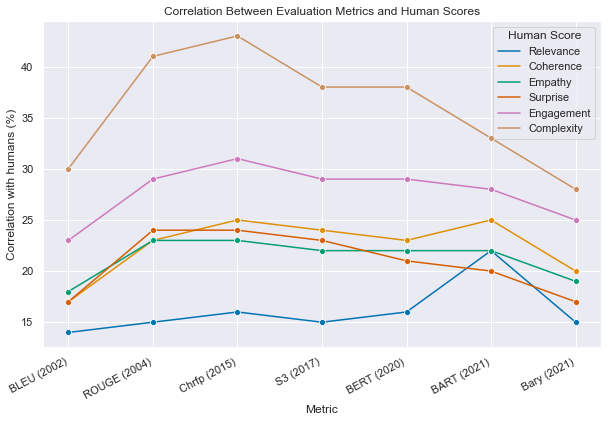

In [24]:
#BLEU (2002) ROUGE (2004) JS (2006) ROUGE-WE (2015) Chrfp (2017)
#S3 (2017) MoverScore (2019) BERTScore (2020) 
human_scores=['Relevance', 'Coherence', 'Empathy', 'Surprise', 'Engagement', 'Complexity']
 
time_metrics=[ 'BLEU Ξ§', 'ROUGE-S* Recall Ξ§','METEOR Ξ§', 'chrF Ξ§', 'ROUGE-WE-3 Recall Ξε', 
              'ROUGE-WE-3 Recall Ξε','S3-Pyramid ΞΔ', 
              'BERTScore Recall Ξε', 'SUPERT-PS ¤ε','BLANC-Golden ΞΔ','DepthScore Ξε',
             'BaryScore-W Ξε','BARTScore-SP ¤Δ','Novelty-1 ¤§','InfoLM-FisherRao ΞΔ' ]


global_metrics= [ 'BLEU Ξ§', 'ROUGE-1 Recall Ξ§', 'chrF Ξ§' ,
                   'S3-Responsiveness ΞΔ',
                 'BERTScore Recall Ξε',
                 'BARTScore-SH ΞΔ', 'BaryScore-SD-0.01 Ξε']

best_story=['chrF Ξ§','ROUGE-1 Recall Ξ§', 'S3-Pyramid ΞΔ', 'S3-Responsiveness ΞΔ', 'BERTScore Recall Ξε' ,'BARTScore-SH ΞΔ']
best_system=['S3-Pyramid ΞΔ', 'S3-Responsiveness ΞΔ','MoverScore Ξε', 'BERTScore F1 Ξε', 'BaryScore-SD-0.01 Ξε','BARTScore-SH ΞΔ', 'DepthScore Ξε']

M=len(global_metrics)
corr1=[]
corr2=[]
corr3=[]
corr4=[]
corr5=[]
corr6=[]

for j in range(M):
    c_metric_relevance= np.array( [json.loads(l) for l in data_scores['Relevance'].tolist()]).T
    c_metric_coherence= np.array( [json.loads(l) for l in data_scores['Coherence'].tolist()]).T
    c_metric_empathy= np.array( [json.loads(l) for l in data_scores['Empathy'].tolist()]).T
    c_metric_surprise= np.array( [json.loads(l) for l in data_scores['Surprise'].tolist()]).T
    c_metric_engagement= np.array( [json.loads(l) for l in data_scores['Engagement'].tolist()]).T
    c_metric_complexity= np.array( [json.loads(l) for l in data_scores['Complexity'].tolist()]).T
    c_metric2= np.array( [json.loads(l) for l in data_scores[global_metrics[j]].tolist()]).T
    

    k1=np.zeros(96)
    k2=np.zeros(96)
    k3=np.zeros(96)
    k4=np.zeros(96)
    k5=np.zeros(96)
    k6=np.zeros(96)
    for l in range(96):
        k1[l]=kendalltau(c_metric_relevance[l],c_metric2[l] )[0]
        k2[l]=kendalltau(c_metric_coherence[l],c_metric2[l] )[0]
        k3[l]=kendalltau(c_metric_empathy[l],c_metric2[l] )[0]
        k4[l]=kendalltau(c_metric_surprise[l],c_metric2[l] )[0]
        k5[l]=kendalltau(c_metric_engagement[l],c_metric2[l] )[0]
        k6[l]=kendalltau(c_metric_complexity[l],c_metric2[l] )[0]
        
        
    corr1.append(abs(round(100*k1.mean())))
    corr2.append(abs(round(100*k2.mean())))
    corr3.append(abs(round(100*k3.mean())))
    corr4.append(abs(round(100*k4.mean())))
    corr5.append(abs(round(100*k5.mean())))
    corr6.append(abs(round(100*k6.mean())))

import seaborn as sns
import matplotlib.pyplot as plt

time_metrics=[ 'BLEU (2002)', 'ROUGE (2004)', 'Chrfp (2015)' ,
                  'S3 (2017)',
                 'BERT (2020)',
                 'BART (2021)', 'Bary (2021)']
# Create a dictionary to hold the correlation data
corr_data = {
    'Metric': time_metrics ,
    'Relevance': corr1,
    'Coherence': corr2,
    'Empathy': corr3,
    'Surprise': corr4,
    'Engagement': corr5,
    'Complexity': corr6
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(corr_data)

# Melt the DataFrame to long format
melted_df = df.melt(id_vars=['Metric'], var_name='Human Score', value_name='Correlation')



# Create a plot using Seaborn
sns.set(style='whitegrid')
sns.set(rc={'figure.figsize':(10,6)})

# Define the color palette to use
custom_palette = sns.color_palette("colorblind", n_colors=6)

# Set the color palette as the default
sns.set_palette(custom_palette)


sns.lineplot(x='Metric', y='Correlation', hue='Human Score',marker='o', data=melted_df)

# Add axis labels and a title
plt.ylabel('Correlation with humans (%)')
plt.title('Correlation Between Evaluation Metrics and Human Scores')
plt.xticks(rotation=28,ha='right')

plt.savefig("Figures/story_corr_time.jpg", dpi=300)

# Show the plot
plt.show()



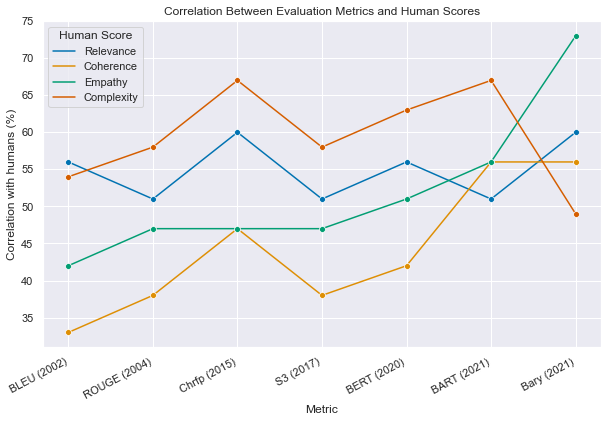

In [25]:

#BLEU (2002) ROUGE (2004) JS (2006) ROUGE-WE (2015) Chrfp (2017)
#S3 (2017) MoverScore (2019) BERTScore (2020) 


#coherance is very correlated with engagement and suprise and thus we can remove those two

human_scores=['Relevance', 'Coherence', 'Empathy', 'Complexity']
 

global_metrics= [ 'BLEU Ξ§', 'ROUGE-1 Recall Ξ§', 'chrF Ξ§' ,
                   'S3-Responsiveness ΞΔ',
                 'BERTScore Recall Ξε',
                 'BARTScore-SH ΞΔ', 'BaryScore-SD-0.01 Ξε']

M=len(global_metrics)
corr1=[]
corr2=[]
corr3=[]
#corr4=[]
#corr5=[]
corr6=[]

for j in range(M):
    c_metric_relevance= np.array( [json.loads(l) for l in data_scores['Relevance'].tolist()]).T
    c_metric_coherence= np.array( [json.loads(l) for l in data_scores['Coherence'].tolist()]).T
    c_metric_empathy= np.array( [json.loads(l) for l in data_scores['Empathy'].tolist()]).T
    #c_metric_surprise= np.array( [json.loads(l) for l in data_scores['Surprise'].tolist()]).T
    #c_metric_engagement= np.array( [json.loads(l) for l in data_scores['Engagement'].tolist()]).T
    c_metric_complexity= np.array( [json.loads(l) for l in data_scores['Complexity'].tolist()]).T
    c_metric2= np.array( [json.loads(l) for l in data_scores[global_metrics[j]].tolist()]).T
    
    k1= kendalltau( np.mean(c_metric_relevance, axis=0),np.mean(c_metric2, axis=0) )[0]
    k2= kendalltau( np.mean(c_metric_coherence, axis=0),np.mean(c_metric2, axis=0) )[0]
    k3= kendalltau( np.mean(c_metric_empathy, axis=0),np.mean(c_metric2, axis=0) )[0]
    #k4= kendalltau( np.mean(c_metric_surprise, axis=0),np.mean(c_metric2, axis=0) )[0]
    #k5= kendalltau( np.mean(c_metric_engagement, axis=0),np.mean(c_metric2, axis=0) )[0]
    k6= kendalltau( np.mean(c_metric_complexity, axis=0),np.mean(c_metric2, axis=0) )[0]
        
       
    corr1.append(abs(round(100*k1)))
    corr2.append(abs(round(100*k2)))
    corr3.append(abs(round(100*k3)))
    #corr4.append(abs(round(100*k4)))
    #corr5.append(abs(round(100*k5)))
    corr6.append(abs(round(100*k6)))

time_metrics=[ 'BLEU (2002)', 'ROUGE (2004)', 'Chrfp (2015)' ,
                  'S3 (2017)',
                 'BERT (2020)',
                 'BART (2021)', 'Bary (2021)']
# Create a dictionary to hold the correlation data
corr_data = {
    'Metric': time_metrics ,
    'Relevance': corr1,
    'Coherence': corr2,
    'Empathy': corr3,
    #'Surprise': corr4,
    #'Engagement': corr5,
    'Complexity': corr6
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(corr_data)

# Melt the DataFrame to long format
melted_df = df.melt(id_vars=['Metric'], var_name='Human Score', value_name='Correlation')



# Create a plot using Seaborn
sns.set(style='whitegrid')
sns.set(rc={'figure.figsize':(10,6)})

# Define the color palette to use
custom_palette = sns.color_palette("colorblind", n_colors=6)

# Set the color palette as the default
sns.set_palette(custom_palette)


sns.lineplot(x='Metric', y='Correlation', hue='Human Score',marker='o', data=melted_df)

# Add axis labels and a title
plt.ylabel('Correlation with humans (%)')
plt.title('Correlation Between Evaluation Metrics and Human Scores')
plt.xticks(rotation=28,ha='right')

plt.savefig("Figures/system_corr_time.jpg", dpi=300, bbox_inches=None)
# Show the plot
plt.show()



#  Borda Count

In [26]:
import pandas as pd

automatic_metrics= all_columns[7:]
# Load data set containing scores for each model and metric
data = data_scores

# Define the list of metrics for which to calculate Borda count
metrics = automatic_metrics

# Calculate the ranks for each model per metric
ranks = {}
for metric in metrics:
    ranks[metric] = data[metric].rank(method='min', ascending=False)

# Calculate the Borda count for each model per metric
borda_counts = {}
for metric in metrics:
    borda_counts[metric] = ranks[metric].sum()

# Calculate the final ranking for each model per metric
rankings = {}
for metric in metrics:
    # Sort models by their scores for the current metric
    sorted_models = data.sort_values(by=[metric], ascending=False)
    # Assign ranks to models based on their order in the sorted list
    sorted_models['Rank'] = range(1, len(sorted_models)+1)
    # Add the current metric's rank to the overall ranking for each model
    sorted_models['Borda Count'] = sorted_models['Rank'] + borda_counts[metric] - ranks[metric]
    # Store the final ranking for the current metric
    rankings[metric] = sorted_models.sort_values(by=['Borda Count'], ascending=True)['Model']

# Combine the final rankings for each metric using a weighted or unweighted average
# For example, an unweighted average could be calculated as follows:
final_ranking = pd.concat(rankings.values()).value_counts().sort_values().index.tolist()

# Print the final ranking of models
print(final_ranking)



['BertGeneration', 'GPT-2 (tag)', 'XLNet', 'GPT-2', 'CTRL', 'RoBERTa', 'Fusion', 'GPT', 'TD-VAE', 'HINT']


In [27]:
import pandas as pd

automatic_metrics= all_columns[7:]
# Load data set containing scores for each model and metric
data = data_scores

# Define the list of metrics for which to calculate Borda count
metrics = automatic_metrics

#lculate the average score for each model and metric

averages = {}
for metric in metrics:
    data[metric]=data[metric].apply(lambda x: json.loads(x))
    averages[metric] = data[metric].apply(lambda x: sum(x) / len(x))

# Calculate the ranks for each model per metric
ranks = {}
for metric in metrics:
    ranks[metric] = averages[metric].rank(method='min', ascending=False)
# Calculate the Borda count for each metric
borda_counts = {}
for metric in metrics:
    borda_counts[metric] = ranks[metric].sum()

# Calculate the final ranking for each metric
rankings = {}
for metric in metrics:
    # Sort models by their scores for the current metric
    sorted_models = data.sort_values(by=[metric], ascending=False)
    # Calculate the average score for each model and metric
    sorted_models[metric] = sorted_models[metric].apply(lambda x: sum(x) / len(x))
    # Assign ranks to models based on their average scores for the current metric
    sorted_models['Rank'] = sorted_models[metric].rank(method='min', ascending=False)
    # Add the current metric's rank to the overall ranking for each model
    sorted_models['Borda Count'] = sorted_models[metric].rank(method='min', ascending=False) + borda_counts[metric] - ranks[metric]
    # Store the final ranking for the current metric
    rankings[metric] = sorted_models.sort_values(by=['Borda Count'], ascending=True)[metric]

# Combine the final rankings for each metric using a weighted or unweighted average
# For example, an unweighted average could be calculated as follows:
final_ranking = pd.DataFrame.from_dict(rankings).mean(axis=1).sort_values().index.tolist()

# Print the final ranking of metrics
print(final_ranking)

C:\Users\maria\AppData\Local\Temp\ipykernel_23076\1261727933.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[metric]=data[metric].apply(lambda x: json.loads(x))


[9, 8, 6, 3, 1, 2, 7, 4, 10, 5]
